
# Visualize Intraday Bid and Ask Prices using Level-1 Quotes

In this tutorial, you’ll learn how to:
1. Fetch **Level-1 Quote** data for a stock from FinFeedAPI.
2. Extract all **Bid** and **Ask** prices across the trading day.
3. Visualize how **Bid** and **Ask** prices moved throughout the trading day with a simple line chart.

We’ll use the **IEX** exchange and symbol **AAPL** as an example, pulling data from **2025-10-01**.



## Step 1 — Setup Environment and API Key

We’ll import the libraries, then add your API Key for authentication.  
> 🔑 Replace `"YOUR_API_KEY_HERE"` with your actual FinFeedAPI key.


In [ ]:

import requests
import json
import matplotlib.pyplot as plt

# Replace with your real FinFeedAPI key
API_KEY = "YOUR_API_KEY_HERE"

headers = {
    "Authorization": API_KEY
}



## Step 2 — Fetch Level-1 Quote Data

We’ll call the following endpoint for AAPL on 2025-10-01:

```
https://api-historical.stock.finfeedapi.com/v1/native/iex/level1-quote/AAPL?date=2025-10-01
```


In [ ]:

url = "https://api-historical.stock.finfeedapi.com/v1/native/iex/level1-quote/AAPL?date=2025-10-01"

response = requests.get(url, headers=headers)
print("Status code:", response.status_code)

if response.status_code == 200:
    quotes = response.json()
    print(f"✅ Retrieved {len(quotes)} quote entries! Showing first 3:")
    print(json.dumps(quotes[:3], indent=2))
else:
    print("❌ Error fetching data:", response.text)



## Step 3 — Visualize Bid and Ask Prices Over Time

Now we’ll extract all the **Bid** and **Ask** prices from the response and plot them as lines to show how they changed throughout the day.


✅ Cleaned data points: 614130


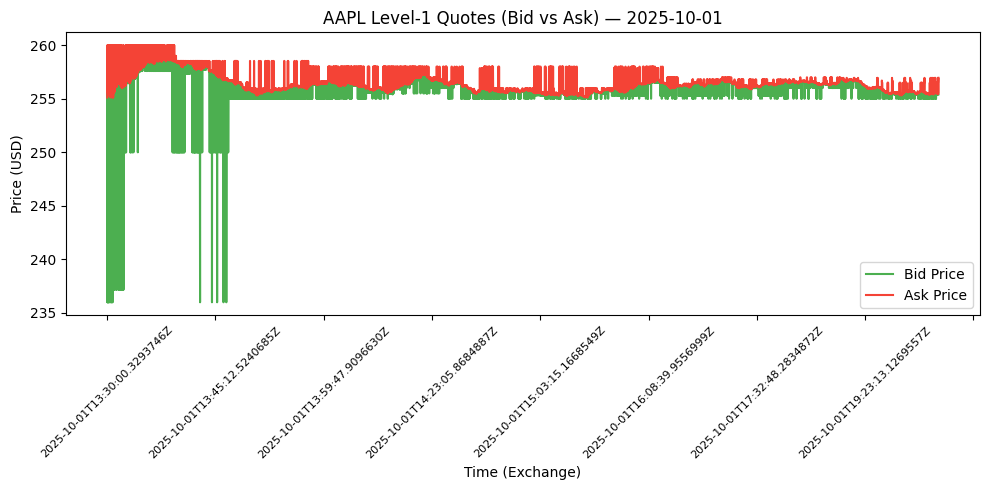

In [9]:
if response.status_code == 200:
    quotes = response.json()

    if quotes:
        times, bids, asks = [], [], []

        # Collect valid entries only
        for q in quotes:
            t = q.get("time_exchange") or q.get("timestamp")
            b = q.get("bid_price") or q.get("bid")
            a = q.get("ask_price") or q.get("ask")

            if t and b is not None and a is not None:
                times.append(t)
                bids.append(b)
                asks.append(a)

        print(f"✅ Cleaned data points: {len(times)}")

        # Downsample for faster plotting
        step = 100  # plot every 100th data point
        times_ds = times[::step]
        bids_ds = bids[::step]
        asks_ds = asks[::step]

        # Plot bid vs ask lines
        plt.figure(figsize=(10, 5))
        plt.plot(times_ds, bids_ds, label="Bid Price", color="#4CAF50")
        plt.plot(times_ds, asks_ds, label="Ask Price", color="#F44336")

        plt.title("AAPL Level-1 Quotes (Bid vs Ask) — 2025-10-01")
        plt.xlabel("Time (Exchange)")
        plt.ylabel("Price (USD)")
        plt.legend()

        # 🩵 Fix overlapping timestamp labels
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
        plt.xticks(rotation=45, fontsize=8)

        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No quote data available.")
else:
    print("❌ Failed to fetch data.")



## ✅ Summary

Each point in the chart represents an update to the best bid or best ask. These changes occur whenever the top of the order book updates.

You’ve successfully:
- Connected to FinFeedAPI’s **Level-1 Quote** endpoint
- Retrieved all **Bid** and **Ask** prices for the day
- Visualized them as a **time-series chart** to see how prices changed

### 💡 Next Ideas
- Plot multiple days side-by-side for comparison.
- Add volume data if available for context.
- Create a moving average line for smoother trends.
